# Exploring data

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [2]:
import pandas as pd
import seaborn as sns

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? 

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object


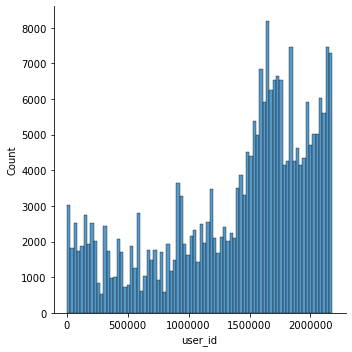

In [3]:
print(churn.dtypes)
sns.displot(churn['user_id'])

2. Do the columns have the right types for the analysis? If not, convert them to the right type. 

In [4]:
churn = churn.astype({"user_id":str,"store_id":str, "trans_id":str,"item_id":str, "dollar":float})
churn['timestamp'] = pd.to_datetime(churn['timestamp'])
churn.dtypes

user_id              object
gender               object
address              object
store_id             object
trans_id             object
timestamp    datetime64[ns]
item_id              object
quantity              int64
dollar              float64
dtype: object

3. Do any columns appear to have unique rows? How do we show that? 

In [5]:
for col in churn.columns:
    print(col)
    print(churn.drop_duplicates(subset = col ))

user_id
        user_id gender address store_id trans_id  timestamp          item_id  \
0        101981      F       E     2860   818463 2000-11-01  4710000000000.0   
18       164252      G       E     2190   818325 2000-11-01  4710000000000.0   
26       166324      I       E     4145   818806 2000-11-01  4710000000000.0   
43       191050      C       E     3818   818703 2000-11-01   723000000000.0   
49       196734      J       H     4546   818868 2000-11-01  4710000000000.0   
...         ...    ...     ...      ...      ...        ...              ...   
252092  2179315      J       E   251908  1628261 2001-02-28  4710000000000.0   
252094  2179346      A       G   251919  1628588 2001-02-28  4710000000000.0   
252109  2179414      F       G   251867  1628249 2001-02-28  4710000000000.0   
252145  2179469      C       E   251912  1628374 2001-02-28  4710000000000.0   
252152  2179605      B       G   251791  1628025 2001-02-28  4710000000000.0   

        quantity  dollar  
0   

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? 
   - What is the date range covered by the data? 
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

In [6]:
churn_df = pd.DataFrame(churn)
count = 0
for i in range(len(churn_df)):
    vol = churn_df.loc[i,"quantity"]
    if vol < 0:
        count += 1
print("there is " + str(count) + " negative quantity found")

start_date = min(churn_df["timestamp"])
end_date = max(churn_df["timestamp"])
print("purchase date are in range " + str(start_date) + " and " + str(end_date))

there is 0 negative quantity found
purchase date are in range 2000-11-01 00:00:00 and 2001-02-28 00:00:00


5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? 
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? 
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In [9]:
# How many transactions on average do users have in a given week?
print("average transactions users have in a given week :" + str(len(churn)/len(churn.drop_duplicates(subset = "user_id" ))))
# Are there items that are more commonly sold in bulk (quantity greater than 1)?
bulk_items = churn['quantity'] > 1
bulk_items

average transactions users have in a given week :25.2204


0         False
1         False
2         False
3         False
4          True
          ...  
252199     True
252200    False
252201    False
252202    False
252203    False
Name: quantity, Length: 252204, dtype: bool

6. Do the results mesh with what we expected? This question requires some domain knowledge

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). 
<span style = "color: blue" float:right> There are multiple features that could be presented to decision makers such as: 
- What are revenue generated by store?
- Popular items by store? which lead to how do we improve other stores (marketing strategies, demographical analytics...)</span>

In [10]:
churn_df.groupby("store_id").sum()

,quantity,dollar
store_id,,
0,1,46.0
1,1,59.0
10,2,48.0
100,1,135.0
1000,1,104.0
...,...,...
99995,1,69.0
99996,2,292.0
99997,1,38.0


8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations. 

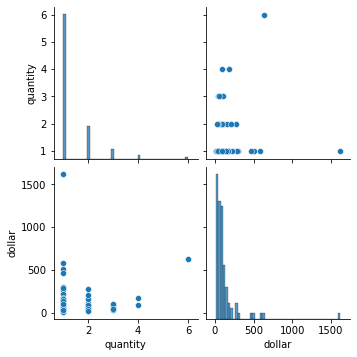

In [12]:
import seaborn as sns
sns.pairplot(churn_df.sample(100))

As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.